<a href="https://colab.research.google.com/github/Katherasala/rkathera_AML-/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Neural Network Performance Analysis

This notebook explores various neural network architectures to predict sentiment in the IMDB dataset. Different models were experimented with, varying in hidden layers, hidden units, and loss functions. Below is the analysis of these models.


In [ ]:
%matplotlib inline
!jupyter nbconvert --to html Neural_Network_Assignment.ipynb
from google.colab import files
files.download('Neural_Network_Assignment.html')

[NbConvertApp] Converting notebook Neural_Network_Assignment.ipynb to html
[NbConvertApp] Writing 593635 bytes to Neural_Network_Assignment.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## Model with One Hidden Layer
- **Overview**: The model was trained using a single hidden layer with 32 units and the `tanh` activation function.
- **Performance**: The training accuracy slowly improved but remained unstable across the epochs. Validation accuracy fluctuated and settled around 50%, indicating possible underfitting.
- **Conclusion**: Using only one hidden layer resulted in suboptimal performance, which might be due to insufficient model complexity.


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4892 - loss: 0.9207 - val_accuracy: 0.4936 - val_loss: 0.8739
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4959 - loss: 0.8622 - val_accuracy: 0.4900 - val_loss: 0.8391
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5017 - loss: 0.8246 - val_accuracy: 0.4916 - val_loss: 0.8118
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5048 - loss: 0.7989 - val_accuracy: 0.4944 - val_loss: 0.7920
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5008 - loss: 0.7856 - val_accuracy: 0.4914 - val_loss: 0.7751
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5001 - loss: 0.7668 - val_accuracy: 0.4928 - val_loss: 0.7627
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4944 - loss: 0.7585 - val_accuracy: 0.4976 - val_loss: 0.7533
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.49

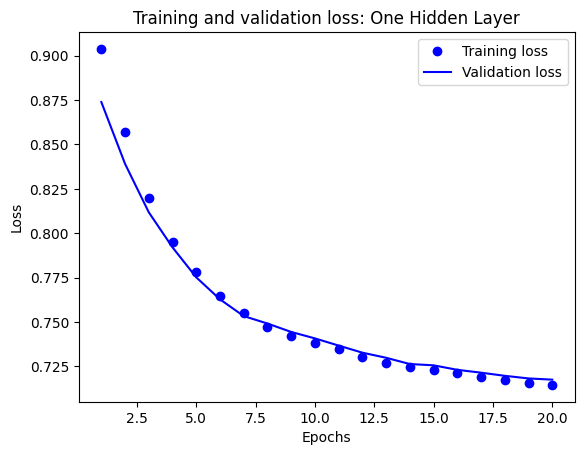

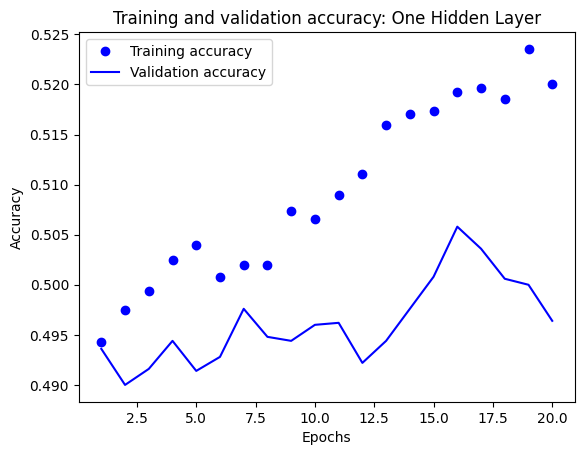

In [ ]:
# Import necessary modules
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data (pad sequences to make them the same length)
partial_x_train = pad_sequences(train_data[:20000], maxlen=256)
partial_y_train = train_labels[:20000]
x_val = pad_sequences(train_data[20000:], maxlen=256)
y_val = train_labels[20000:]

# One hidden layer model
model_one_hidden_layer = models.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_one_hidden_layer.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_one_hidden_layer = model_one_hidden_layer.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

import matplotlib.pyplot as plt

def plot_history(history, title):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    acc = history_dict.get("accuracy", None)
    val_acc = history_dict.get("val_accuracy", None)
    epochs = range(1, len(loss_values) + 1)

    # Plot training and validation loss
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title(f"Training and validation loss: {title}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # If accuracy is available, plot training and validation accuracy
    if acc and val_acc:
        plt.clf()
        plt.plot(epochs, acc, "bo", label="Training accuracy")
        plt.plot(epochs, val_acc, "b", label="Validation accuracy")
        plt.title(f"Training and validation accuracy: {title}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
# Plot the results for one hidden layer
plot_history(history_one_hidden_layer, "One Hidden Layer")



## Model with Three Hidden Layers
- **Overview**: This model had three hidden layers with 32 units each.
- **Performance**: Training accuracy was slightly better than the one-hidden-layer model, but the validation accuracy hovered around 50%. Training loss consistently decreased, but validation loss did not improve much.
- **Conclusion**: Increasing the model complexity did not lead to better generalization, likely due to overfitting or a lack of sufficient regularization.


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5017 - loss: 0.8326 - val_accuracy: 0.4932 - val_loss: 0.8078
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5061 - loss: 0.8042 - val_accuracy: 0.4948 - val_loss: 0.7980
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5013 - loss: 0.7953 - val_accuracy: 0.5018 - val_loss: 0.7909
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5107 - loss: 0.7880 - val_accuracy: 0.5066 - val_loss: 0.7837
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5092 - loss: 0.7824 - val_accuracy: 0.4948 - val_loss: 0.7796
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5190 - loss: 0.7748 - val_accuracy: 0.4936 - val_loss: 0.7741
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5082 - loss: 0.7703 - val_accuracy: 0.5078 - val_loss: 0.7686
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 0.7648 - val_accuracy: 0.4986 - val_l

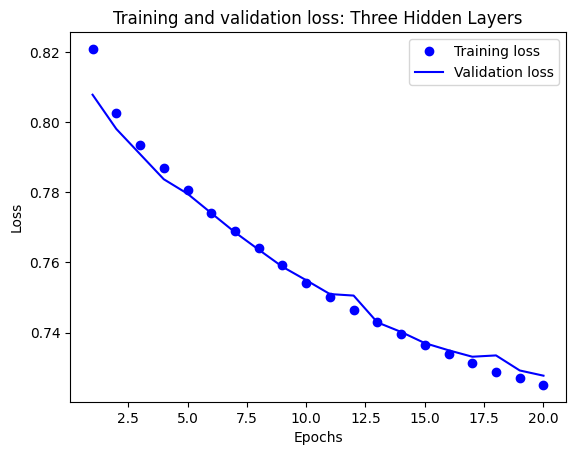

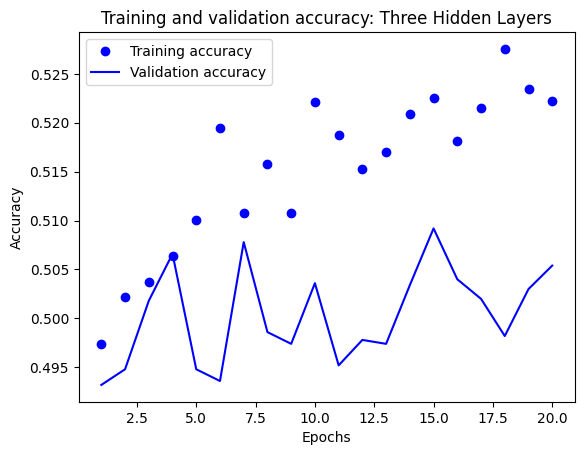

In [ ]:

# Three hidden layers model
model_three_hidden_layers = models.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_three_hidden_layers.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_three_hidden_layers = model_three_hidden_layers.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Plot the results for three hidden layers
plot_history(history_three_hidden_layers, "Three Hidden Layers")



## Model with More Hidden Units (64)
- **Overview**: This model used 64 units per layer, increasing the model capacity.
- **Performance**: Training accuracy improved, but validation accuracy showed fluctuations. The model seemed to generalize slightly better than previous models.
- **Conclusion**: Increasing the number of units per layer showed marginal improvements, though more epochs or regularization could enhance generalization.


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4977 - loss: 0.9042 - val_accuracy: 0.5010 - val_loss: 0.8591
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5100 - loss: 0.8479 - val_accuracy: 0.4996 - val_loss: 0.8426
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5172 - loss: 0.8366 - val_accuracy: 0.5056 - val_loss: 0.8369
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5206 - loss: 0.8271 - val_accuracy: 0.4950 - val_loss: 0.8292
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5243 - loss: 0.8177 - val_accuracy: 0.4900 - val_loss: 0.8317
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5258 - loss: 0.8124 - val_accuracy: 0.4950 - val_loss: 0.8205
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5226 - loss: 0.8070 - val_accuracy: 0.5124 - val_loss: 0.8091
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5233 - loss: 0.8017 - val_accuracy: 0.5066 - val

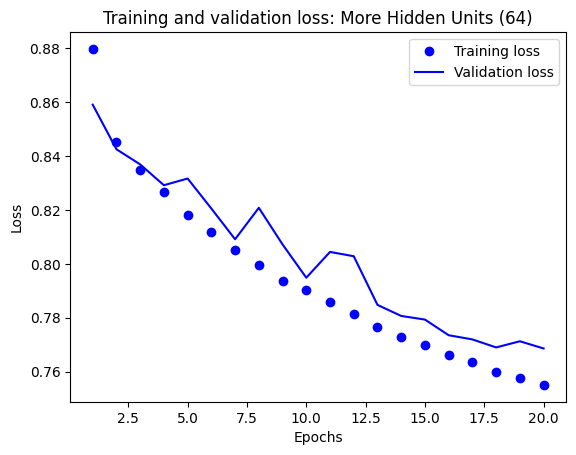

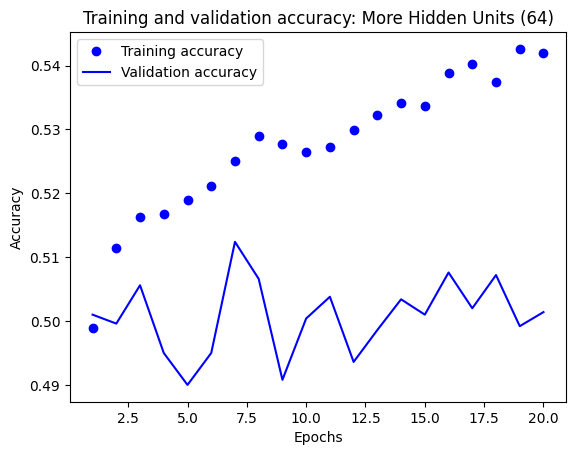

In [ ]:

# Model with 64 hidden units
model_more_hidden_units = models.Sequential([
    layers.Dense(64, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_more_hidden_units.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_more_hidden_units = model_more_hidden_units.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Plot the results for 64 hidden units
plot_history(history_more_hidden_units, "More Hidden Units (64)")



## Model with MSE Loss Function
- **Overview**: This model replaced the default `binary_crossentropy` loss with `mse`.
- **Performance**: While training loss steadily decreased, validation accuracy was unstable. The model performed similarly to the `binary_crossentropy` model but did not show substantial improvements.
- **Conclusion**: MSE as a loss function did not significantly improve the results, likely because `binary_crossentropy` is more suitable for binary classification tasks.


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5037 - loss: 0.3549 - val_accuracy: 0.4904 - val_loss: 0.3330
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5037 - loss: 0.3300 - val_accuracy: 0.4926 - val_loss: 0.3253
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5125 - loss: 0.3215 - val_accuracy: 0.4988 - val_loss: 0.3224
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5179 - loss: 0.3164 - val_accuracy: 0.4884 - val_loss: 0.3151
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5190 - loss: 0.3109 - val_accuracy: 0.5024 - val_loss: 0.3093
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5195 - loss: 0.3065 - val_accuracy: 0.5006 - val_loss: 0.3056
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5165 - loss: 0.3027 - val_accuracy: 0.5016 - val_loss: 0.3022
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5141 - loss: 0.2990 - val_accuracy: 0.4984 - val_loss

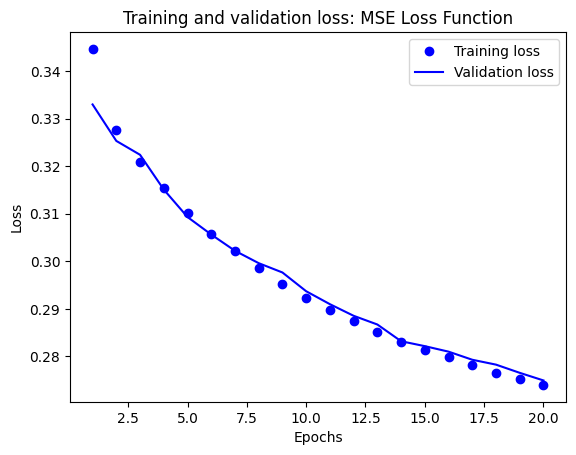

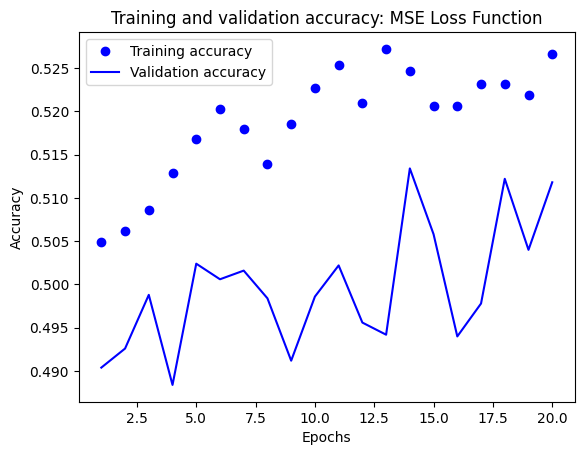

In [ ]:

# Model with MSE loss function
model_mse_loss = models.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_mse_loss.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
history_mse_loss = model_mse_loss.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

# Plot the results for MSE loss
plot_history(history_mse_loss, "MSE Loss Function")



## Overall Summary
In this experiment, altering the number of hidden layers, units, and loss function led to different outcomes. While increasing model complexity generally improved training performance, validation accuracy remained low, possibly indicating overfitting or insufficient regularization.
